# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# To filter the warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

pd.set_option('display.float_format', lambda x: '%.3f' % x)



## Data Overview

- Observations
- Sanity checks

In [ ]:
#mounting google colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/University Of Texas/Supervised Learning - Classification/INNHotelsGroup.csv')

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.680,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.500,0,Canceled


In [ ]:
df.shape

(36275, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No null values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.000,1.845,0.519,0.000,2.000,2.000,2.000,4.000
no_of_children,36275.000,0.105,0.403,0.000,0.000,0.000,0.000,10.000
no_of_weekend_nights,36275.000,0.811,0.871,0.000,0.000,1.000,2.000,7.000
no_of_week_nights,36275.000,2.204,1.411,0.000,1.000,2.000,3.000,17.000
required_car_parking_space,36275.000,0.031,0.173,0.000,0.000,0.000,0.000,1.000
lead_time,36275.000,85.233,85.931,0.000,17.000,57.000,126.000,443.000
arrival_year,36275.000,2017.820,0.384,2017.000,2018.000,2018.000,2018.000,2018.000
arrival_month,36275.000,7.424,3.070,1.000,5.000,8.000,10.000,12.000
arrival_date,36275.000,15.597,8.740,1.000,8.000,16.000,23.000,31.000
repeated_guest,36275.000,0.026,0.158,0.000,0.000,0.000,0.000,1.000


Insights:

* ```no_of_week_nights``` is right skewed once that the MAX value is much higher than Q3 and median
* ```lead_time``` is right skewed
* Few variables can be trated as numerical, my hint: ```avg_price_per_room```, ```lead_time```

In [ ]:
df.duplicated().sum()

0

No duplicated values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

Univariate Analysiscat

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
cat = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests', 'booking_status']

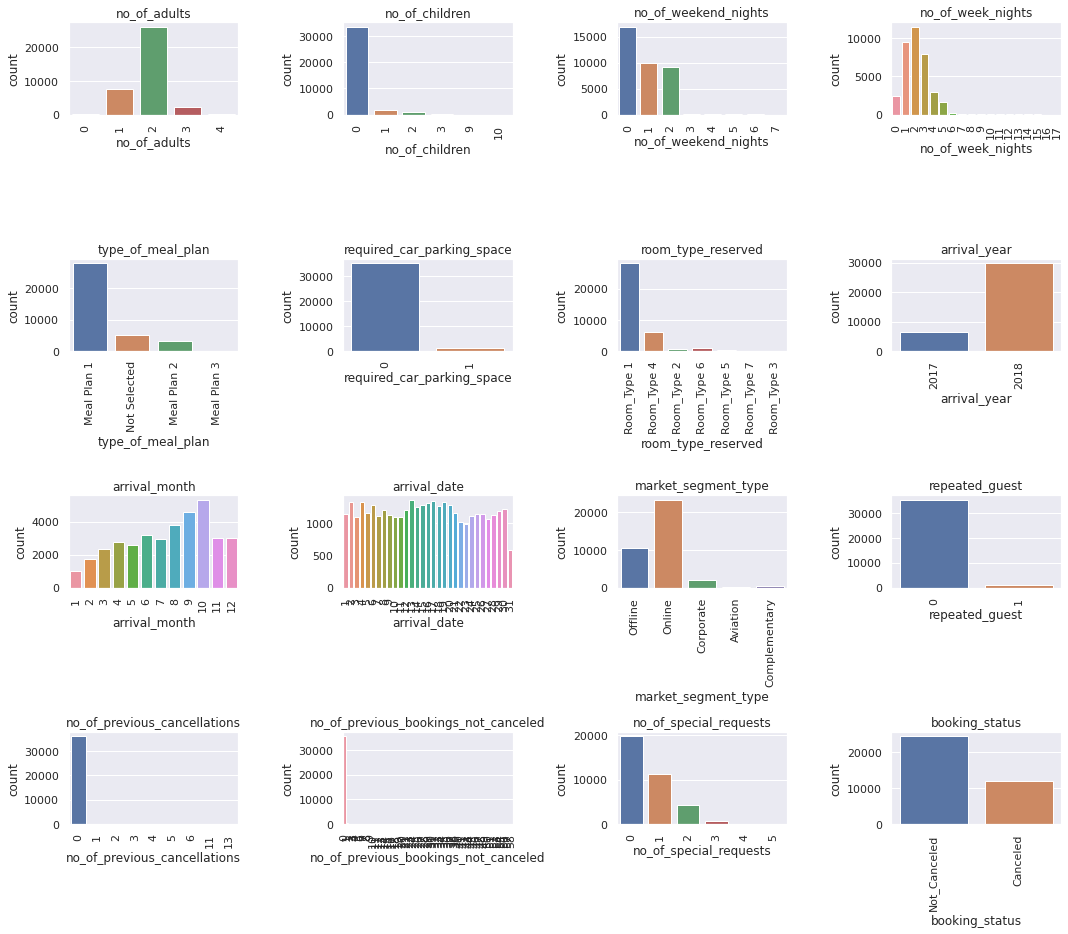

In [ ]:
#Ploting a countplot for all categorical features

plt.figure(figsize=(15,15))
sns.set_theme()

for i,column in enumerate(cat):
  plt.subplot(5, 4, i + 1)
  sns.countplot(data=df, x=df[column])
  plt.tight_layout()
  plt.title(column)
  plt.xticks(rotation=90)

plt.show()

insights:

* Most of the bookins are for 2 adults and no kids
* Most of the bookings are from online market segment
* ```arrival_date``` forms an uniform distribution
* Far majority don't need car parking space
* Most of the bookings are for short stayage. Like one, two or three days. There are some outliers though

Will do some further investigation on:
* ```no_of_previos_bookings_no_canceled```
* ```no_of_previous_cancelations```
* ```no_of_weekend_nights```
* ```no_of_week_nights```

In [ ]:
averigate = ['no_of_previous_bookings_not_canceled',
'no_of_previous_cancellations',
'no_of_weekend_nights',
'no_of_week_nights']

In [ ]:
for i in averigate:
  print(i+":", len(df[i].unique()))

no_of_previous_bookings_not_canceled: 59
no_of_previous_cancellations: 9
no_of_weekend_nights: 8
no_of_week_nights: 18


In [ ]:
for i in averigate:
  print(i+":", df[i].value_counts())
  print(50*'-')

no_of_previous_bookings_not_canceled: 0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64
--------------------------------------------------
no_of_previous_cancellations: 0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no

In the pre-processing part I'll simplify these variables into fewer categories to lower the model complexity

Understanding the distribution of the continuous features

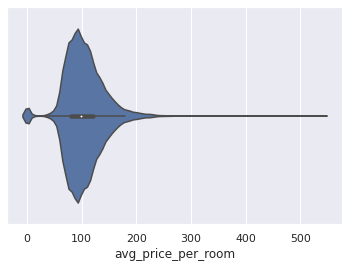

In [ ]:
sns.violinplot(data=df, x='avg_price_per_room');

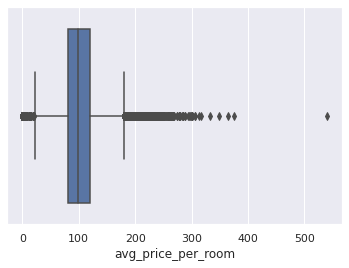

In [ ]:
sns.boxplot(data=df, x='avg_price_per_room');

There's a lot of presence of non dense tail which indicates the presence of outliers. When looking at the boxplot seems close to a normal distribution, when looking at the *kde*  we can notice the presence of outliers. I believe after the pre-processing this will look much closer to a normal curve if I replace outliers by the median. But, in order to preserv much of the possible variance I'll replace the outliers for the max and min IQR * 1.5

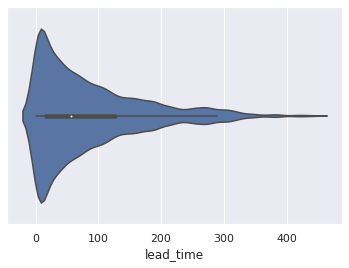

In [ ]:
sns.violinplot(data=df, x='lead_time');

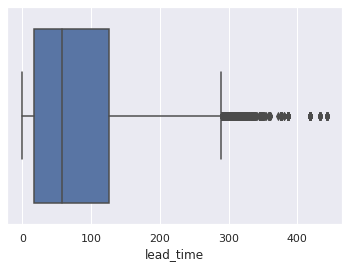

In [ ]:
sns.boxplot(data=df, x='lead_time');

Also we can see the presence of outliers and the tail is more dense, so what deforms the distribution is not only the presence of outliers, but also the nature of the distribution itself. Even after the pre-processing step this distribution will still be right skewed

Bivariate Analysis

In [ ]:
df_2 = df.copy()
df_2 = df_2.drop(["Booking_ID"], axis=1)
df_2.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

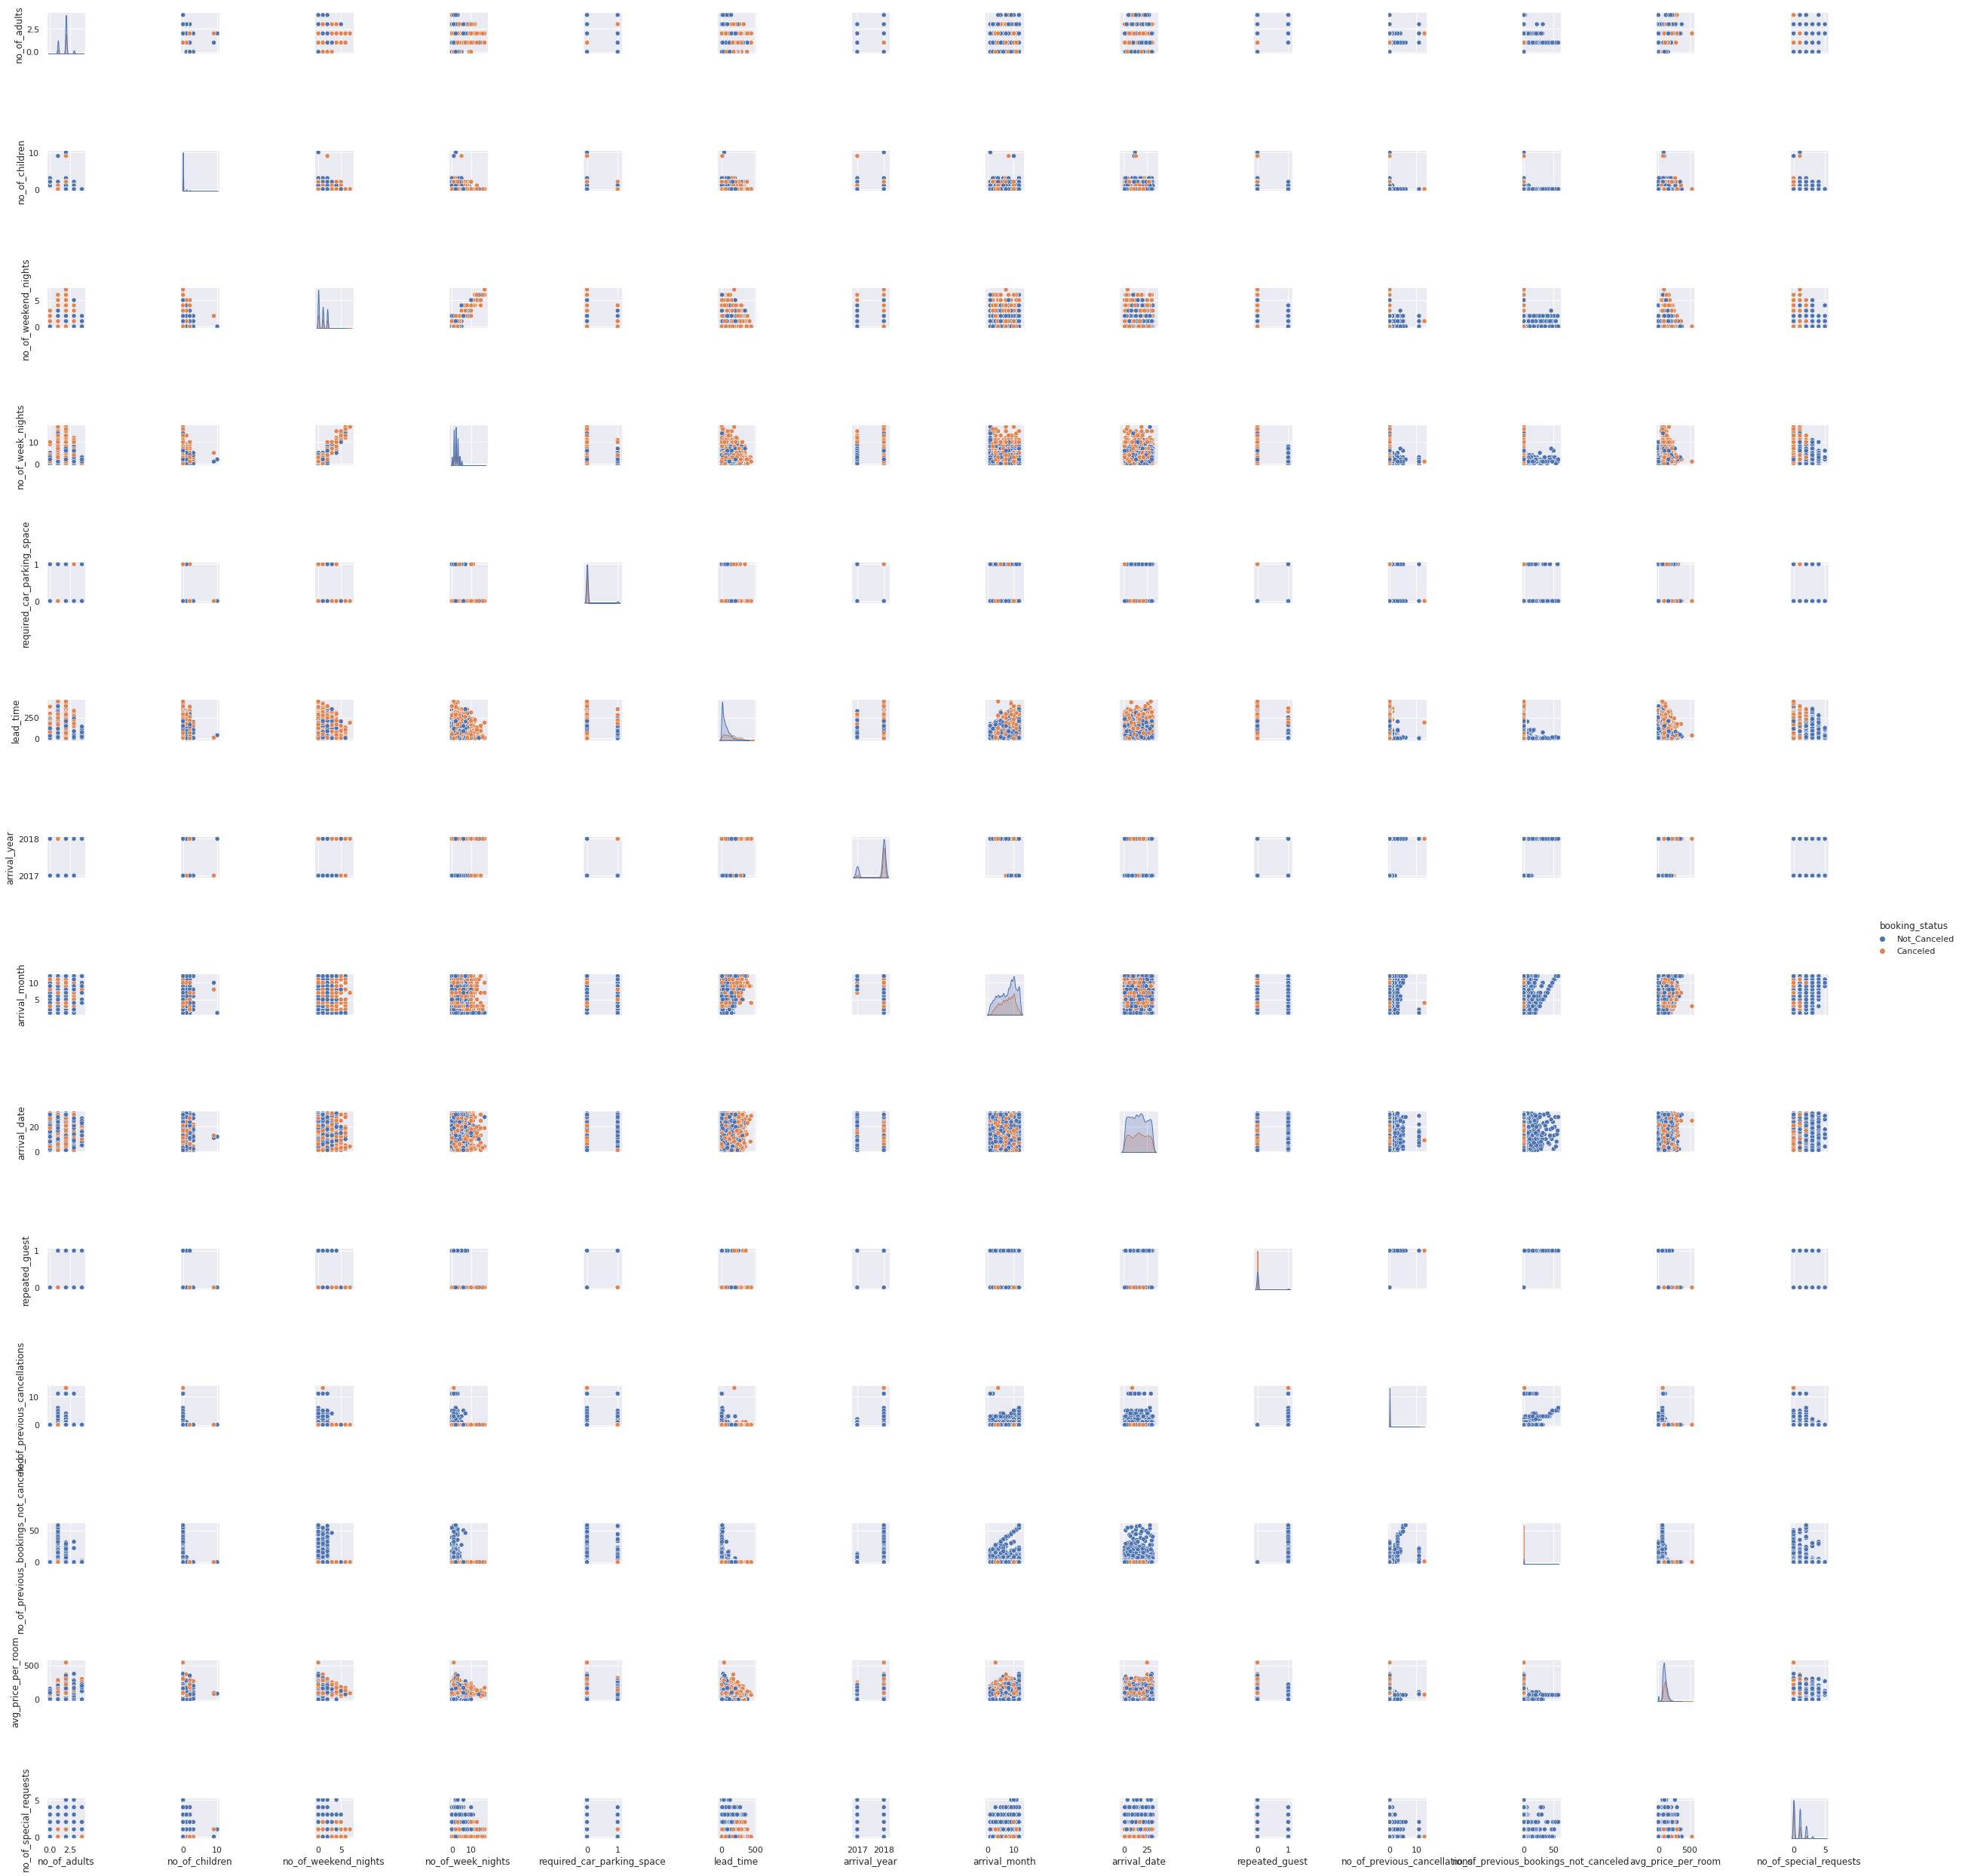

In [ ]:
sns.pairplot(df_2, hue='booking_status');

Very poor visualization, but the goal here is to understand the shape of the scatterplot and check if there's concentration of colors, what would indicate information (patterns) that might explain the cancellation behaviour. 

Some insights:

Insights:

* ```avg_price_per_room``` seems to have a negative correlation to ```no_of_week_nights``` also we can see that most of the cancellations are at the top of the scatterplot which indicates higher the price higher the cancelation
* At ```no_of_week_nights``` and ```no_of_special_requests``` we can see that the cancellations are concentrated at the median to the botton of the special requests, which indicates that the bookings that have less special requests tend to cancelate more
* ```lead_time```and ```avg_price_per_room``` are negative correlated and there's a concentration of the cancellations from the median to the higher prices
* The higher the ```lead_time``` higher the cancellations

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/University Of Texas/Supervised Learning - Classification/INNHotelsGroup.csv')

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
gb_lead = df.groupby(['lead_time','booking_status', 'market_segment_type'], as_index=False)['Booking_ID'].count()
gb_lead.head(2)

,lead_time,booking_status,market_segment_type,Booking_ID
0,0,Canceled,Aviation,1
1,0,Canceled,Corporate,7


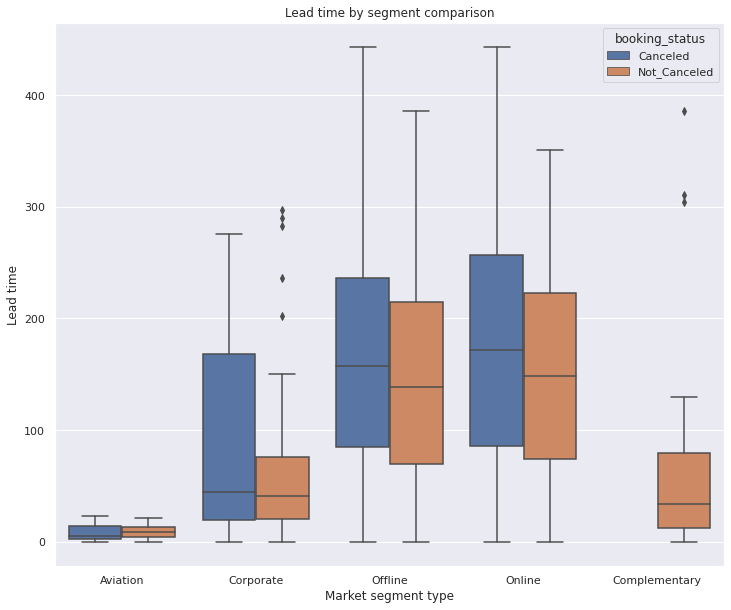

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(data=gb_lead, x='market_segment_type', y='lead_time', hue='booking_status');
plt.title('Lead time by segment comparison');
plt.xlabel('Market segment type');
plt.ylabel('Lead time');

Insights:



*   Aviation has no difference between cancelled and not cancelled
*   Corporate has the biggest difference in behavior between cancelled and not cancelled
* Offline and online both have same behaviour when it comes to cancellation 



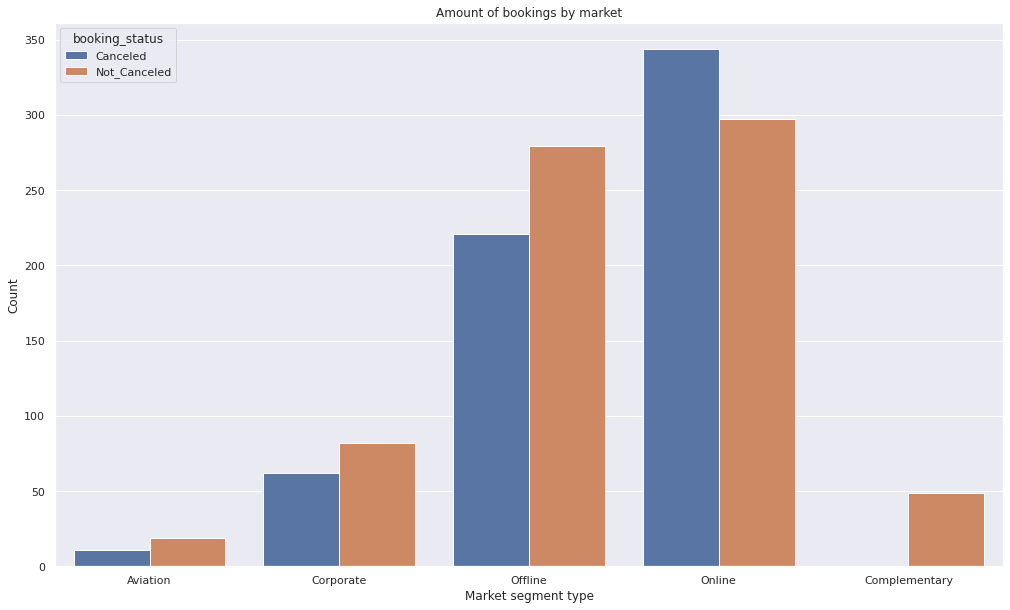

In [ ]:
plt.figure(figsize=(17,10))
sns.countplot(data=gb_lead, x='market_segment_type', hue='booking_status');
plt.title('Amount of bookings by market');
plt.xlabel('Market segment type');
plt.ylabel('Count');

Insights:

* Based on previous slide I though corporate would have a very different behaviour when compared to other segments, BUT when compared it presents same behaviour
* All features (excluding complementary which is only not cancelled) presents same cancelling behaviour

I'll search for seasonal patterns for cancellation:

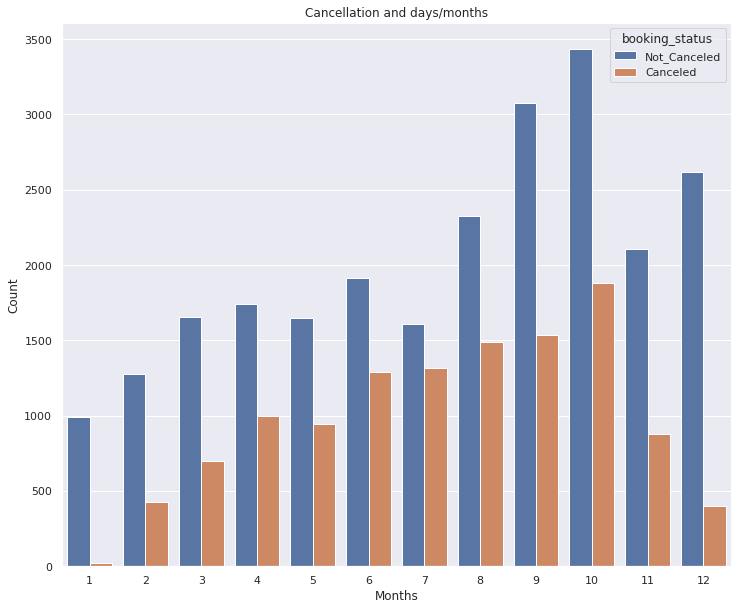

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=df, x='arrival_month', hue='booking_status')
plt.title('Cancellation and days/months');
plt.xlabel('Months');
plt.ylabel('Count');

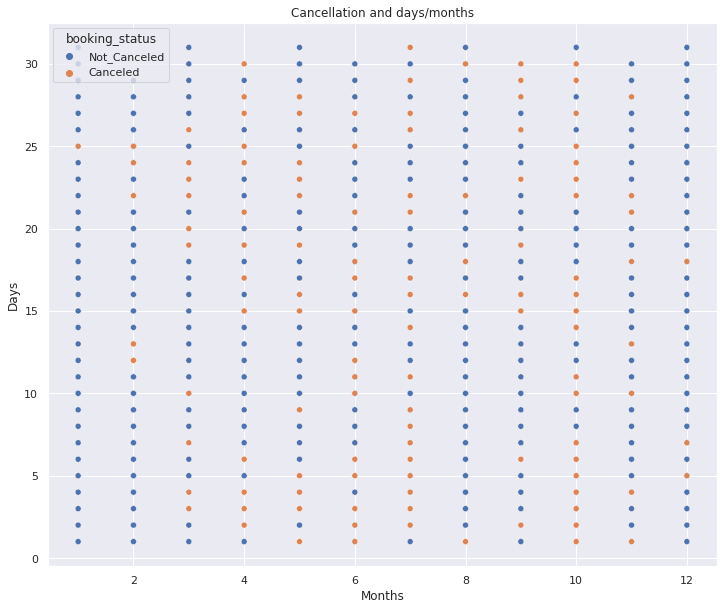

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, y='arrival_date', x='arrival_month', hue='booking_status');
plt.title('Cancellation and days/months');
plt.xlabel('Months');
plt.ylabel('Days');

Insights:

* Based on both last graphs, couldn't identify any pattern of cancellation

In [ ]:
gb_room = df.groupby(['room_type_reserved', 'lead_time','booking_status', 'market_segment_type', 'avg_price_per_room'], as_index=False)['Booking_ID'].count()
gb_room.head(2)

,room_type_reserved,lead_time,booking_status,market_segment_type,avg_price_per_room,Booking_ID
0,Room_Type 1,0,Canceled,Aviation,95.000,1
1,Room_Type 1,0,Canceled,Corporate,65.000,1


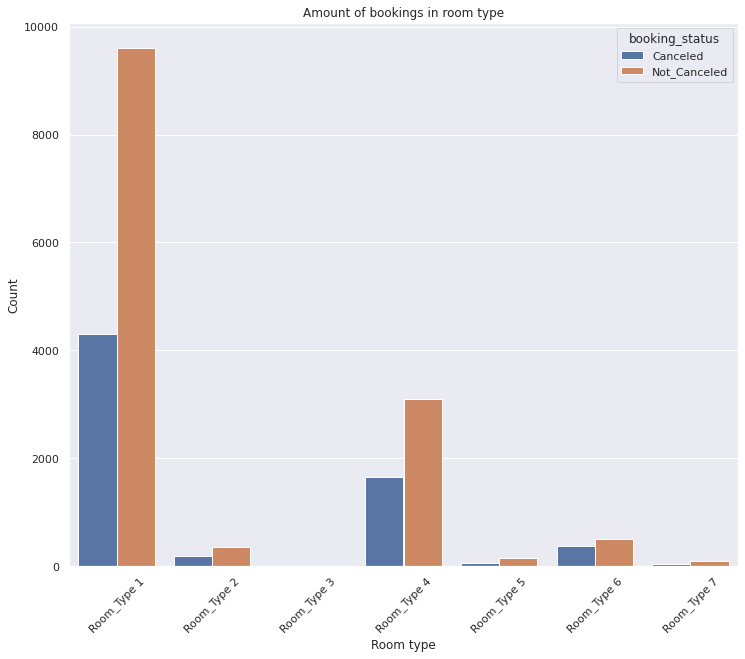

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=gb_room, x='room_type_reserved', hue='booking_status');
plt.title('Amount of bookings in room type');
plt.xlabel('Room type');
plt.ylabel('Count');
plt.xticks(rotation=45);

Insights:

* Concentration of booking for type 1 room
* All rooms shows similar behaviour when it comes to cancellations

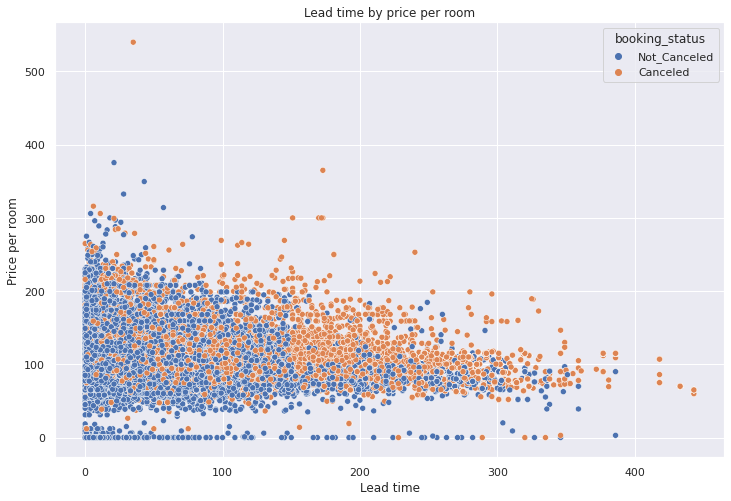

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='lead_time', y='avg_price_per_room', hue='booking_status')
plt.title('Lead time by price per room');
plt.xlabel('Lead time');
plt.ylabel('Price per room');

Insights:

* Weak negative correlation
* Concentration of cancellations in prices above 100 and with lead time higher than 150

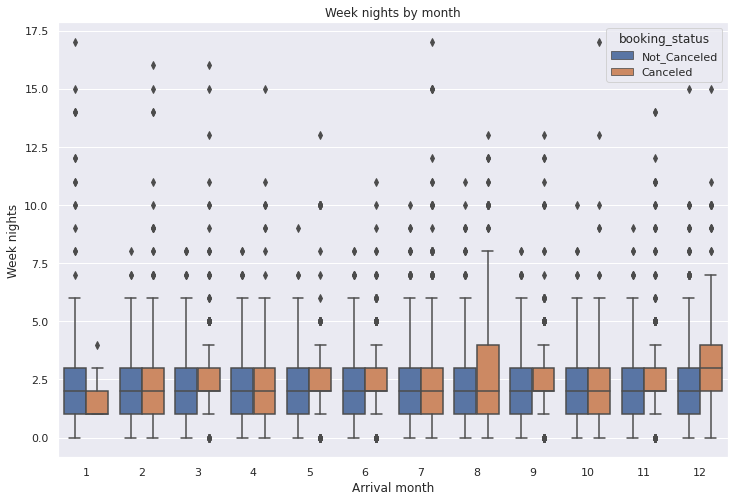

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, y='no_of_week_nights', x='arrival_month', hue='booking_status')
plt.title('Week nights by month');
plt.xlabel('Arrival month');
plt.ylabel('Week nights');


Insights:

* In month 8 and 12 we can see difference in amount of nights presents in cancellations bookings. all others shows similar behaviour.

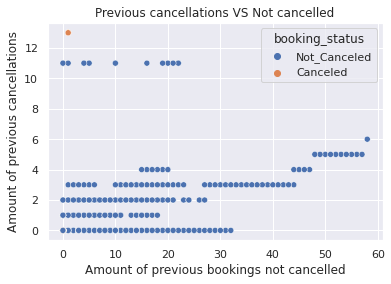

In [ ]:
sns.scatterplot(data=df, y='no_of_previous_cancellations', x='no_of_previous_bookings_not_canceled', hue='booking_status' );
plt.title('Previous cancellations VS Not cancelled');
plt.xlabel('Amount of previous bookings not cancelled');
plt.ylabel('Amount of previous cancellations');

Insights:

* Considering one exception, this group is homogeneous. Maybe ```no_of_previous_bookings_not_canceled``` would be usefull to the model, but this is a very imbalanced feature, so there might not be much use

I believe we understood much of the information of the dataset and the relationship between the x variables with the target variable and some relationship between some x variables too.

Considering that we still have to answer six business questions, I think the EDA is purpose is reached.


Answering Business Questions

1. What are the busiest months in the hotel?

In [ ]:
gb_month = df.groupby(['arrival_year','arrival_month'], as_index=False)['Booking_ID'].count()
gb_month


,arrival_year,arrival_month,Booking_ID
0,2017,7,363
1,2017,8,1014
2,2017,9,1649
3,2017,10,1913
4,2017,11,647
5,2017,12,928
6,2018,1,1014
7,2018,2,1704
8,2018,3,2358
9,2018,4,2736


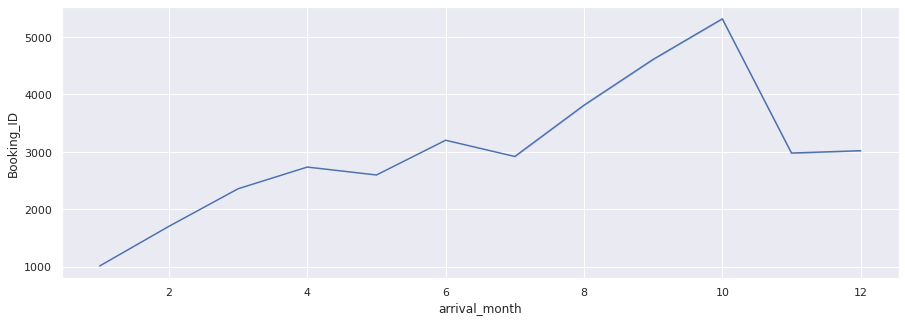

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme()

sns.lineplot(data=gb_month, x='arrival_month', y='Booking_ID', estimator='sum', ci=False);

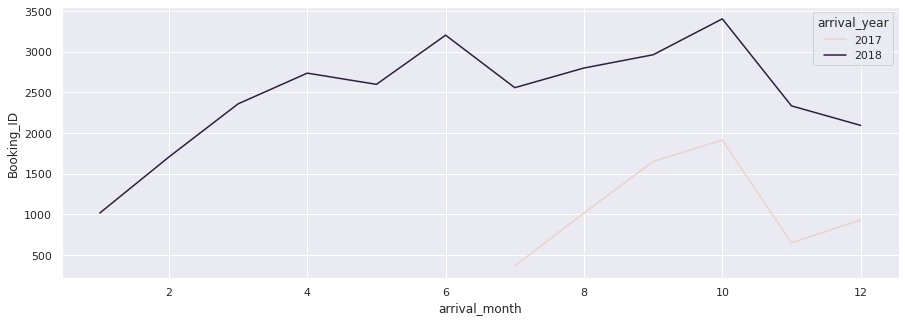

In [ ]:
plt.figure(figsize=(15,5))

sns.lineplot(data=gb_month, x='arrival_month', y='Booking_ID', hue='arrival_year');

The busiest months are October, September and August. Even though we don't have comple 2017 data, seems to follow same pattern as 2018.

2. Which market segment do most of the guests come from?

In [ ]:
df['market_segment_type'].value_counts(normalize=True)*100

Online          63.994
Offline         29.023
Corporate        5.560
Complementary    1.078
Aviation         0.345
Name: market_segment_type, dtype: float64

64% of the bookings come from the online market segment

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

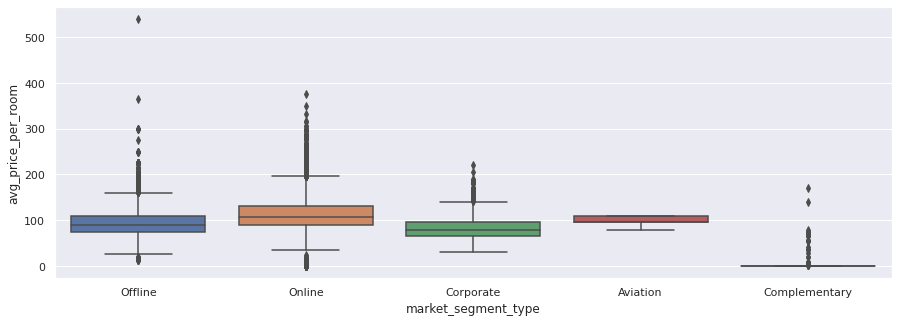

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, y='avg_price_per_room', x='market_segment_type');

Insights:

* In aviation seems to be a regular fare tha vary very little
* Complementary seems to be the opposit, high variance even though the prices are very low when compared to the others - I think that the complementary are the prices of promotions for the no-show (cancelled) bookings
* Offline segment seems to have balanced price when compared to Corporate and Onlie *but* presents some high average prices as outliers
* Online segment has the highers prices in general. Has the higgher Q3, higher median but not by far. Very close to aviation, offline and corporate segment

4. What percentage of bookings are canceled?

In [ ]:
df.head(2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.680,1,Not_Canceled


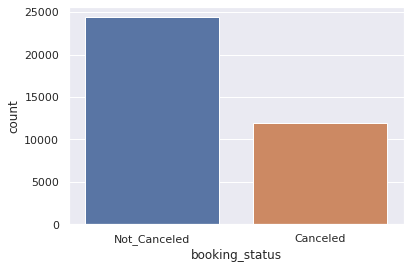

In [ ]:
sns.countplot(data=df, x='booking_status');

In [ ]:
df['booking_status'].value_counts(normalize=True)*100

Not_Canceled   67.236
Canceled       32.764
Name: booking_status, dtype: float64

'booking_status' correspond to 67% of the dataset. Well balanced dataset for categories prediction

5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

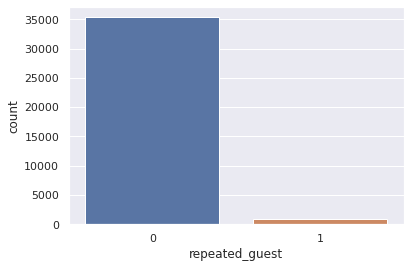

In [ ]:
sns.countplot(data=df, x='repeated_guest');

In [ ]:
df['repeated_guest'].value_counts(normalize=True)*100

0   97.436
1    2.564
Name: repeated_guest, dtype: float64

97.5% of the guests are not repetead. Very imbalanced dataset by this optic.
Only 2.5% of the bookings are from repeated clients

In [ ]:
repeated_guests = df[df['repeated_guest'] == 1]

gb_rep = repeated_guests.groupby(['repeated_guest','booking_status'], as_index=False)['Booking_ID'].count()
gb_rep

,repeated_guest,booking_status,Booking_ID
0,1,Canceled,16
1,1,Not_Canceled,914


In [ ]:
perc_cancel = round(gb_rep['Booking_ID'][0]/gb_rep['Booking_ID'][1]*100,2)
perc_cancel

1.75

1.75% of the repeated guests cancel their bookings

6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
#first I'll understand the % of bookings with special requests

df['no_of_special_requests'].value_counts(normalize=True)*100

0   54.520
1   31.352
2   12.030
3    1.861
4    0.215
5    0.022
Name: no_of_special_requests, dtype: float64

54% of the bookings have no special requests

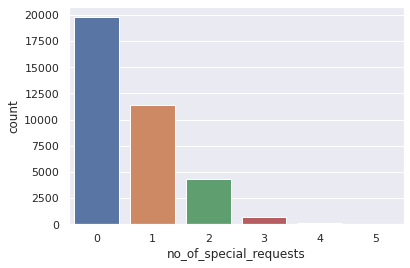

In [ ]:
sns.countplot(data=df, x='no_of_special_requests');

In [ ]:
gb_bs = df.groupby(['booking_status', 'no_of_special_requests'], as_index=False)['Booking_ID'].count()
gb_bs

,booking_status,no_of_special_requests,Booking_ID
0,Canceled,0,8545
1,Canceled,1,2703
2,Canceled,2,637
3,Not_Canceled,0,11232
4,Not_Canceled,1,8670
5,Not_Canceled,2,3727
6,Not_Canceled,3,675
7,Not_Canceled,4,78
8,Not_Canceled,5,8


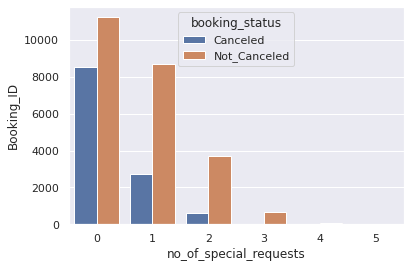

In [ ]:
sns.barplot(data=gb_bs, x='no_of_special_requests', y='Booking_ID', hue='booking_status');

Seems to be a relationship between ```no_of_special_requests``` and ```booking_status```. The more special requests, less the cancellation rate

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

Outlier Treatment

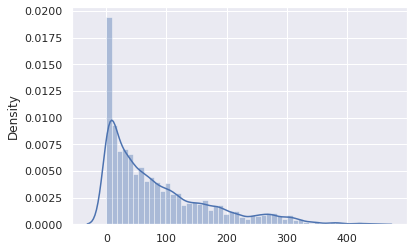

In [ ]:
#verifying again the distribution

sns.distplot(x=df['lead_time']);

In [ ]:
#calculate interquartile range 
q3, q1 = np.percentile(df['lead_time'], [75 ,25])
iqr = q3 - q1

median = df['lead_time'].median()

#display interquartile range 
print("IQR:",iqr)

#defining outliers range
lower_limit = median - (iqr * 1.5)
higher_limit = median + (iqr * 1.5)


print("Median:",median)
print("Lower limit:",lower_limit)
print("Higher limit:",higher_limit)

IQR: 109.0
Median: 57.0
Lower limit: -106.5
Higher limit: 220.5


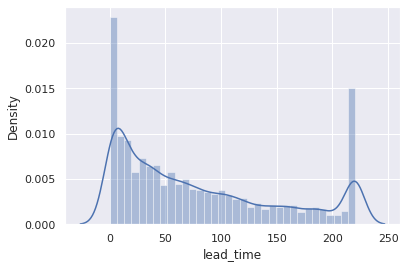

In [ ]:
df['lead_time'] = np.where(df["lead_time"] >higher_limit, higher_limit,df['lead_time'])
df['lead_time'] = np.where(df["lead_time"] <lower_limit, lower_limit,df['lead_time'])

sns.distplot(df['lead_time']);

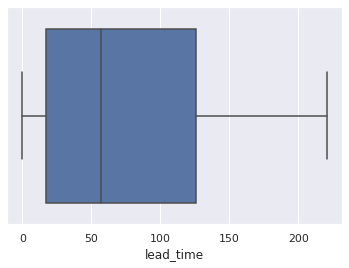

In [ ]:
sns.boxplot(df['lead_time']);

Still an abnormal distribution, but the intent wasn't to transform into a normal curve, but to eliminate the outliers keeping most of the variance possible

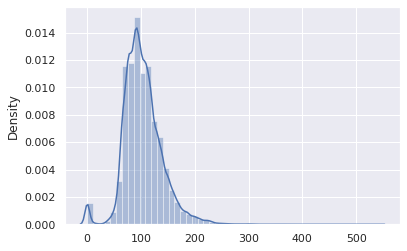

In [ ]:
#verifying again the distribution

sns.distplot(x=df['avg_price_per_room']);

In [ ]:
#calculate interquartile range 
q3, q1 = np.percentile(df['avg_price_per_room'], [75 ,25])
iqr = q3 - q1

median = df['avg_price_per_room'].median()

#display interquartile range 
print("IQR:",iqr)

#defining outliers range
lower_limit = median - (iqr * 1.5)
higher_limit = median + (iqr * 1.5)


print("Median:",median)
print("Lower limit:",lower_limit)
print("Higher limit:",higher_limit)

IQR: 39.7
Median: 99.45
Lower limit: 39.9
Higher limit: 159.0


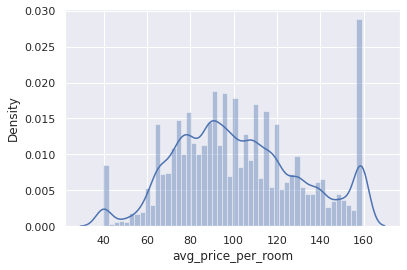

In [ ]:
df['avg_price_per_room'] = np.where(df["avg_price_per_room"] >higher_limit, higher_limit,df['avg_price_per_room'])
df['avg_price_per_room'] = np.where(df["avg_price_per_room"] <lower_limit, lower_limit,df['avg_price_per_room'])

sns.distplot(df['avg_price_per_room']);

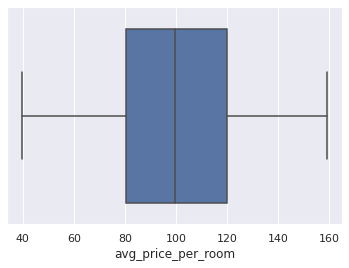

In [ ]:
sns.boxplot(df['avg_price_per_room']);

The goal here was to maintain the variance, once variance is importante both for logist regression and for decision trees

Feature Simplifying

In [ ]:
df['no_of_previous_bookings_not_canceled'] = df["no_of_previous_bookings_not_canceled"].apply(lambda x: 1 if x > 0 else 0)
df['no_of_weekend_nights'] = df["no_of_weekend_nights"].apply(lambda x: '0 to 3' if x < 4 else '4 or more')
df['no_of_children'] = df["no_of_children"].apply(lambda x: 1 if x > 0 else 0)
df['no_of_week_nights'] = df["no_of_week_nights"].apply(lambda x: '0 to 6' if x < 7 else '7 or higher')
df['booking_status'] = df["booking_status"].apply(lambda x: 0 if x == 'Not_Canceled' else 1)

print(df['no_of_previous_bookings_not_canceled'].value_counts())
print(df['no_of_weekend_nights'].value_counts())
print(df['no_of_children'].value_counts())
print(df['no_of_week_nights'].value_counts())
print(df['booking_status'].value_counts())

0    35463
1      812
Name: no_of_previous_bookings_not_canceled, dtype: int64
0 to 3       36091
4 or more      184
Name: no_of_weekend_nights, dtype: int64
0    33577
1     2698
Name: no_of_children, dtype: int64
0 to 6         35951
7 or higher      324
Name: no_of_week_nights, dtype: int64
0    24390
1    11885
Name: booking_status, dtype: int64


In [ ]:
bins = [0,80,120,140,1000]
labels = ['0-79','80-119', '120-139', '140+']

df['avg_price_per_room'] = pd.cut(df['avg_price_per_room'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
bins = [0,100,200,1000]
labels = ['0-99','100-199', '200+']

df['lead_time'] = pd.cut(df['lead_time'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
#transforming all objects features into categorical

for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature])


In [ ]:
#transforming some numerical features into categorical


numcat = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space',
       'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests','booking_status', 'lead_time', 'avg_price_per_room']


for feature in numcat:
    if df[feature].dtype == 'int64':
        df[feature] = pd.Categorical(df[feature])

The ```arrival_year``` is not relevant for the analysis, because of that I'll drop. ```room_type_reserved``` is very concentrated for that I'll drop.

In [ ]:
#saving the dataset with all the variables to the decision tree model
df_dtree = df.copy()
df_dtree.head(2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,0 to 3,0 to 6,Meal Plan 1,0,Room_Type 1,200+,2017,10,2,Offline,0,0,0,0-79,0,0
1,INN00002,2,0,0 to 3,0 to 6,Not Selected,0,Room_Type 1,0-99,2018,11,6,Online,0,0,0,80-119,1,0


I'll have to drop ```lead_time``` and ```avg_price_per_room``` because they generate the error below when fitting the LG:

LinAlgError: Singular matrix

__________________________




Also will drop ```room_type_reserved``` because it has concentration in one category and at the EDA it has shown no effect on the target variable
Also will drop ```arrival_year``` because in my understanding it has no value in this analysis once that I don't have much historicak data and the season is captured by months and days

In [ ]:
df.drop(["Booking_ID", "arrival_year", 'room_type_reserved', 'lead_time', 'avg_price_per_room'], axis=1, inplace=True)
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'no_of_special_requests',
       'booking_status'],
      dtype='object')

In [ ]:
#Taking a last look at tgge dataset before using it for the modelling
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
0,2,0,0 to 3,0 to 6,Meal Plan 1,0,10,2,Offline,0,0,0,0,0
1,2,0,0 to 3,0 to 6,Not Selected,0,11,6,Online,0,0,0,1,0
2,1,0,0 to 3,0 to 6,Meal Plan 1,0,2,28,Online,0,0,0,0,1
3,2,0,0 to 3,0 to 6,Meal Plan 1,0,5,20,Online,0,0,0,0,1
4,2,0,0 to 3,0 to 6,Not Selected,0,4,11,Online,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  category
 1   no_of_children                        36275 non-null  category
 2   no_of_weekend_nights                  36275 non-null  category
 3   no_of_week_nights                     36275 non-null  category
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  category
 6   arrival_month                         36275 non-null  category
 7   arrival_date                          36275 non-null  category
 8   market_segment_type                   36275 non-null  category
 9   repeated_guest                        36275 non-null  category
 10  no_of_previous_cancellations          36275 non-null  category
 11  no

all columns are categories and ready to go into the lg model

## Building a Logistic Regression model

Spliting the dataset, adding the constant and creating the dummy variables

In [ ]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 72)
Shape of test set :  (10883, 72)
Percentage of classes in training set:
0   0.672
1   0.328
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.672
1   0.328
Name: booking_status, dtype: float64


## Checking Multicollinearity

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                      665.285
no_of_adults_1              49.982
no_of_adults_2              58.771
no_of_adults_3              18.168
no_of_adults_4               1.176
                             ...  
no_of_special_requests_1     1.244
no_of_special_requests_2     1.267
no_of_special_requests_3     1.059
no_of_special_requests_4     1.016
no_of_special_requests_5     1.004
Length: 72, dtype: float64



In [ ]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

         Current function value: 0.514180
         Iterations: 35


In [ ]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25320
Method:                           MLE   Df Model:                           71
Date:                Thu, 25 Aug 2022   Pseudo R-squ.:                  0.1870
Time:                        22:06:14   Log-Likelihood:                -13056.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.0743      0.476     -8.556      0.000      -5.008      -3.141
no_of_adults_1                            -0.30

There are some features with P>0.05 but once they're dummy variables we will tolerate them

Visualizing the coefficients

In [ ]:
# converting coefficients to odds
odds = np.exp(lg.params)

# finding the percentage change
perc_change_odds = (np.exp(lg.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,const,no_of_adults_1,no_of_adults_2,no_of_adults_3,no_of_adults_4,no_of_children_1,no_of_weekend_nights_4 or more,no_of_week_nights_7 or higher,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,required_car_parking_space_1,arrival_month_2,arrival_month_3,arrival_month_4,arrival_month_5,arrival_month_6,arrival_month_7,arrival_month_8,arrival_month_9,arrival_month_10,arrival_month_11,arrival_month_12,arrival_date_2,arrival_date_3,arrival_date_4,arrival_date_5,arrival_date_6,arrival_date_7,arrival_date_8,arrival_date_9,arrival_date_10,arrival_date_11,arrival_date_12,arrival_date_13,arrival_date_14,arrival_date_15,arrival_date_16,arrival_date_17,arrival_date_18,arrival_date_19,arrival_date_20,arrival_date_21,arrival_date_22,arrival_date_23,arrival_date_24,arrival_date_25,arrival_date_26,arrival_date_27,arrival_date_28,arrival_date_29,arrival_date_30,arrival_date_31,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_1,no_of_previous_cancellations_1,no_of_previous_cancellations_2,no_of_previous_cancellations_3,no_of_previous_cancellations_4,no_of_previous_cancellations_5,no_of_previous_cancellations_6,no_of_previous_cancellations_11,no_of_previous_cancellations_13,no_of_previous_bookings_not_canceled_1,no_of_special_requests_1,no_of_special_requests_2,no_of_special_requests_3,no_of_special_requests_4,no_of_special_requests_5
Odds,0.017,0.738,1.242,1.445,0.694,1.315,5.081,2.513,2.081,9316049.791,0.765,0.267,21.825,22.993,28.523,35.687,48.113,50.182,36.263,33.611,43.177,35.563,8.214,0.453,0.820,0.815,0.606,0.816,0.681,0.676,0.476,0.564,0.533,0.875,0.556,0.459,0.982,0.692,0.760,0.547,0.881,0.725,0.601,0.740,0.752,0.771,0.755,0.897,0.790,0.937,0.624,0.905,0.703,0.000,0.678,1.048,3.546,11180218.410,0.000,0.000,0.027,578.191,2764.097,17.405,0.000,7133772770655154995200.000,0.000,0.232,0.094,0.000,0.000,0.000
Change_odd%,-98.300,-26.171,24.195,44.514,-30.617,31.515,408.107,151.258,108.061,931604879.143,-23.504,-73.266,2082.532,2199.272,2752.270,3468.739,4711.340,4918.236,3526.280,3261.058,4217.705,3456.274,721.391,-54.667,-18.018,-18.490,-39.438,-18.382,-31.924,-32.395,-52.375,-43.578,-46.677,-12.489,-44.380,-54.109,-1.808,-30.803,-23.990,-45.318,-11.852,-27.521,-39.870,-26.047,-24.798,-22.860,-24.472,-10.321,-20.996,-6.341,-37.631,-9.494,-29.659,-100.000,-32.224,4.754,254.556,1118021740.991,-100.000,-100.000,-97.268,57719.088,276309.664,1640.540,-100.000,713377277065515554045952.000,-100.000,-76.808,-90.556,-100.000,-100.000,-100.000


The interpretation of the coefficients is harmed because I didn't exclude the multicolinearity and high P Values, but still, i'm aiming to better predict instead of interpreting

## Model performance evaluation

In [ ]:
# predicting on training set
# default threshold is 0.5, if predicted probability is greater than 0.5 the observation will be classified as 1

pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

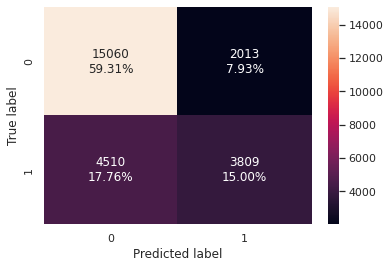

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

#### The confusion matrix

* True Positives (TP): A booking is cancelled and the model predicted cancellation.
* True Negatives (TN): A booking is not cancelled and the model predicted no cancellation.
* False Positives (FP): The model predicted cancellation but the but the booking is not cancelled
* False Negatives (FN): The model predicted no cancellation but the booking is cancelled.

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.743,0.458,0.654,0.539


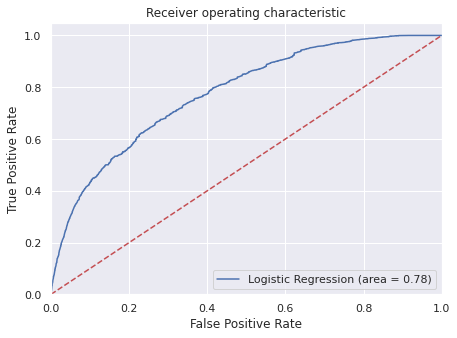

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a good performance on training set

Test Performance

In [ ]:
X_test = X_test[list(X_train.columns)]

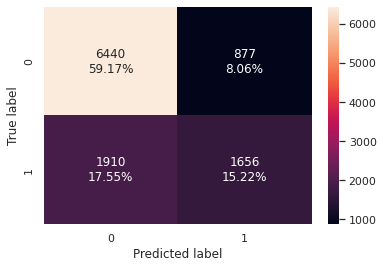

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_test, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.744,0.464,0.654,0.543


Insights:

* In this case ```precision``` is the most important metric and 65% is pretty acceptable
* Positive results for ```precision``` and ```accuracy``` and the test performance is close to the training performance which indicates we have no overfitting and by the ```precision``` value the model captured good amount of information

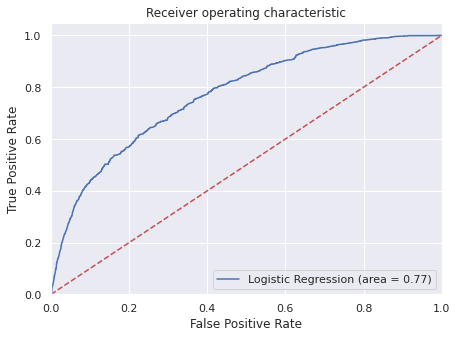

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## Final Model Summary

In [ ]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25320
Method:                           MLE   Df Model:                           71
Date:                Thu, 25 Aug 2022   Pseudo R-squ.:                  0.1870
Time:                        22:06:16   Log-Likelihood:                -13056.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.0743      0.476     -8.556      0.000      -5.008      -3.141
no_of_adults_1                            -0.30

## Building a Decision Tree model

In [ ]:
df_dtree.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

Spliting and creating the dummy variables

In [ ]:
X = df_dtree.drop('booking_status', axis=1)
Y = df_dtree["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 36357)
Shape of test set :  (10883, 36357)
Percentage of classes in training set:
0   0.671
1   0.329
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.676
1   0.324
Name: booking_status, dtype: float64


Close to the same % of ```booking_status``` 1 in both training and testing sets

Fitting the model

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Creating functions to evaluate the model:

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

Creating function to make the confusion matrix with percentages:

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Training dataset results

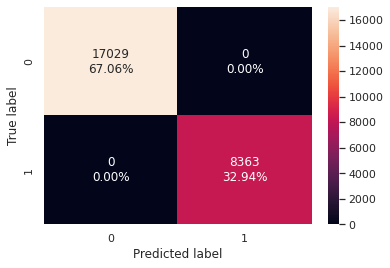

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


The training dataset has overfitted at the training data once we didn't pre-prune and the tree has grown to the max.

Let's check if it has the ability to generalise to the test data

Results on test dataset

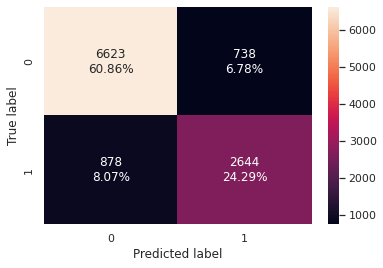

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.852,0.751,0.782,0.766


Altough the model has overfitted in the training data, the model has performed well into the test data. Specially when we look at ```precision``` which is the most important metric for this problem

## Do we need to prune the tree?

The model has overfitted on the training dataset but presented satisfying performance no Precicion and F1 score.

The decision tree model presented better performance than Logistic Regression.
For that reason, the tree don't need to be pruned.

But still we could post prune it and check if we're considering unrelevant data and lower the model complexity.

________________________________________________


I tryied to perform post prunning seeking to improve the precision performance trying to find the best alpha but at the part of training the model it keeps processing and couldn't take that long. 

So, once the result in the training dataset is satisfying for predicting purpose i'll leave as it is

## Model Performance Comparison and Conclusions

In [ ]:
print("Decision tree test performance:\n",  decision_tree_perf_test_without)
print("Logistic Regression test performance:\n", log_reg_model_test_perf)


Decision tree test performance:
    Accuracy  Recall  Precision    F1
0     0.852   0.751      0.782 0.766
Logistic Regression test performance:
    Accuracy  Recall  Precision    F1
0     0.744   0.464      0.654 0.543


The Decision Tree has higher ```accuracy``` and ```precision``` (which in this case is the most valuable metric) and ```F1``` score. So we would stay with Decision Tree model in order to predict which bookings will be canceled or not

## Actionable Insights and Recommendations

* First of all, the company has to integrate the output of the model at some system, such as CRM or ERP so the data can be provided to other areas.
After that the hotel is ready to use the data as a tool to decrease the cancellation rate.
* Lets pretend for a second that the output of the model is integrated to the company CRM system and now into the database there's this feature called ```probably_cancel``` and it will be filled with 0 or 1.

* The hotel could follow close to the bookings that are marked as ```probably_cancel``` and adopt some actions in order to reduce or have a B plan for the room, such as:


1.   Having the reception to call to confirm withing certain periodos during the lead time;
2.   Demanding some kind of pre certification of showing for those rooms;
3.   Demanding some reservation fee that is part of the booking value and that would be not refundable in case of no show;

* The hotel could increase the fee of the clients/bookings market as ```probably_cancel``` in order to better balance with it's risk.

* The hotel has to make many tests through time to understand what reduces the % of False Negatives

* its important to keep track of the falses negatives and try to isolate the causes of it's change because it can be chaging because of the actions of the hotel to decrease the no-shows OR it can be changing because of the model itself or any other external phenomena.
* That's why it's important to experiment a lot and perform hypothesis testing, because the actions in order to avoid the cancelation will affected back the hability to predict of the model.
* Also, knowing that, it's important to review the model through time adding the data of the recomended actions so the actions the hotel take will be part of the predicting of the model.

